## Importing Neccessary Libraries

In [136]:
# Import all the neccessary Libraries

# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


## Importing the Data set for Analysis

In [137]:

# Reading the arrhythmia dataset from a CSV file
data_df = pd.read_csv('arrhythmia-1.data.csv')

# Displaying the first few rows of the dataset
data_df.head()

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?


In [138]:
# display the number of non-null values, data type, and memory usage of each column in the dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           452 non-null    int64 
 1   Sex           452 non-null    int64 
 2   Height        452 non-null    int64 
 3   Weight        452 non-null    int64 
 4   QRS Duration  452 non-null    int64 
 5   P-R interval  452 non-null    int64 
 6   Q-T interval  452 non-null    int64 
 7   T interval    452 non-null    int64 
 8   P interval    452 non-null    int64 
 9   QRS           452 non-null    int64 
 10  T             452 non-null    object
 11  P             452 non-null    object
 12  QRST          452 non-null    object
 13  J             452 non-null    object
 14  Heart rate    452 non-null    object
dtypes: int64(10), object(5)
memory usage: 53.1+ KB


In [139]:
# display a summary of the statistical measures (count, mean, standard deviation, minimum, quartiles, and maximum)
# for each numerical attribute in the dataframe.
data_df.describe()

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000


In [140]:
data_df.describe(include='all')

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452,452,452,452,452
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171,102,135,70,64
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,60,62,?,63
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,23,9,376,21
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,NaN,NaN,NaN,NaN,NaN
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,NaN,NaN,NaN,NaN,NaN
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,NaN,NaN,NaN,NaN,NaN
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,NaN,NaN,NaN,NaN,NaN
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,NaN,NaN,NaN,NaN,NaN


In [141]:
data_df['Heart rate'].unique()

array(['63', '53', '75', '71', '?', '84', '70', '67', '64', '72', '73',
       '56', '76', '66', '77', '69', '68', '83', '79', '51', '81', '93',
       '80', '62', '82', '91', '89', '98', '78', '65', '59', '57', '104',
       '92', '54', '60', '86', '74', '50', '85', '103', '101', '61', '58',
       '138', '94', '96', '88', '115', '97', '102', '87', '55', '44',
       '100', '163', '124', '112', '123', '107', '117', '122', '49',
       '120'], dtype=object)

### Seeing the dataset

In [142]:
data_df

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80


### Handling Missing DATA

In [143]:
question_marks = (data_df == '?').sum()
question_marks

Age               0
Sex               0
Height            0
Weight            0
QRS Duration      0
P-R interval      0
Q-T interval      0
T interval        0
P interval        0
QRS               0
T                 8
P                22
QRST              1
J               376
Heart rate        1
dtype: int64

### Replace Missing Data with NaN

In [144]:
data_new = data_df.replace('?', np.nan)
# Seeing the data again
data_new

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,NaN,63
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,NaN,53
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,NaN,71
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,NaN,63
448,37,0,190,85,100,137,361,201,73,86,66,52,79,NaN,73
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80


In [145]:
# Understanding the shape of the data
data_new.shape

(452, 15)

In [146]:
### Testing to find out if missing data is still available
question_marks = (data_new == '?').sum()
question_marks

Age             0
Sex             0
Height          0
Weight          0
QRS Duration    0
P-R interval    0
Q-T interval    0
T interval      0
P interval      0
QRS             0
T               0
P               0
QRST            0
J               0
Heart rate      0
dtype: int64

In [147]:
# display the total number of missing values in each column of the dataframe.
# Since I replaced the Missing data with NaN, now I test to see which values are null
data_new.isnull().sum()

Age               0
Sex               0
Height            0
Weight            0
QRS Duration      0
P-R interval      0
Q-T interval      0
T interval        0
P interval        0
QRS               0
T                 8
P                22
QRST              1
J               376
Heart rate        1
dtype: int64

In [148]:

data_new.columns

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS Duration', 'P-R interval',
       'Q-T interval', 'T interval', 'P interval', 'QRS', 'T', 'P', 'QRST',
       'J', 'Heart rate'],
      dtype='object')

In [149]:
data_new.describe(include='all')

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,444,430,451,76,451
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170,101,134,69,63
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,60,62,84,63
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,23,9,3,21
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,NaN,NaN,NaN,NaN,NaN
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,NaN,NaN,NaN,NaN,NaN
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,NaN,NaN,NaN,NaN,NaN
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,NaN,NaN,NaN,NaN,NaN
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,NaN,NaN,NaN,NaN,NaN


### Visualizing our data

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Sex'}>,
        <AxesSubplot: title={'center': 'Height'}>],
       [<AxesSubplot: title={'center': 'Weight'}>,
        <AxesSubplot: title={'center': 'QRS Duration'}>,
        <AxesSubplot: title={'center': 'P-R interval'}>],
       [<AxesSubplot: title={'center': 'Q-T interval'}>,
        <AxesSubplot: title={'center': 'T interval'}>,
        <AxesSubplot: title={'center': 'P interval'}>],
       [<AxesSubplot: title={'center': 'QRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

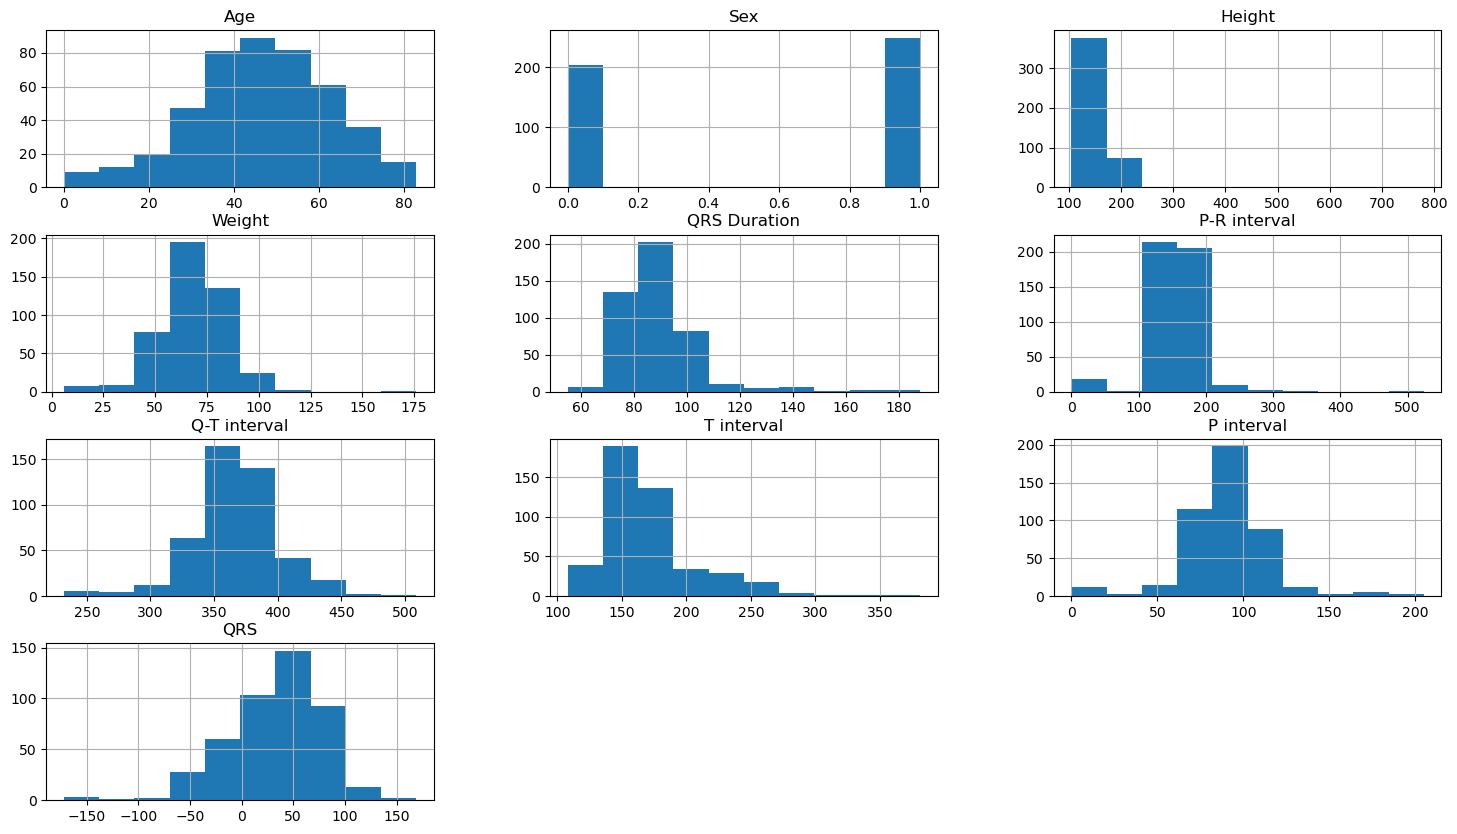

In [150]:
data_new.hist(['Age', 'Sex', 'Height', 'Weight', 'QRS Duration', 'P-R interval',
       'Q-T interval', 'T interval', 'P interval', 'QRS', 'T', 'P', 'QRST',
       'J', 'Heart rate'], figsize=(18, 10))

#### Since most of our data is continous and not normally distributed, we use the median to replace the NaN else we use the mean

### Replace the NaN with Median for the  J column



In [151]:
# Converting the data column to float
data_new['J']= data_new['J'].astype(float)
# Calculating the median for J
median= data_new['J'].median()
median

# Replacing the NaN with median
data_new['J']=data_new['J'].fillna(median).astype(int)





### Replace the NaN with Median for the  T column



In [152]:
data_new['T'] = data_new['T'].astype(float)
# Calculating the median for T
median= data_new['T'].median()
median

# Replacing the NaN with median
data_new['T']=data_new['T'].fillna(median).astype(int)

### Replace the Nan with Mean for the P column since it is normally distributed

In [153]:
data_new['P'] = data_new['P'].astype(float)
# Calculating the mean for P
mean= data_new['P'].mean()
mean

# Replacing the NaN with mean
data_new['P']=data_new['P'].fillna(mean).astype(int)

### Replace the NaN with Median FOR THE QRST column since it is not normally distributed

In [154]:
data_new['QRST'] = data_new['QRST'].astype(float)
# Calculating the median for T
median= data_new['QRST'].median()
median

# Replacing the NaN with median
data_new['QRST']=data_new['QRST'].fillna(median).astype(int)

### Visualize the Heart Rate

<AxesSubplot: >

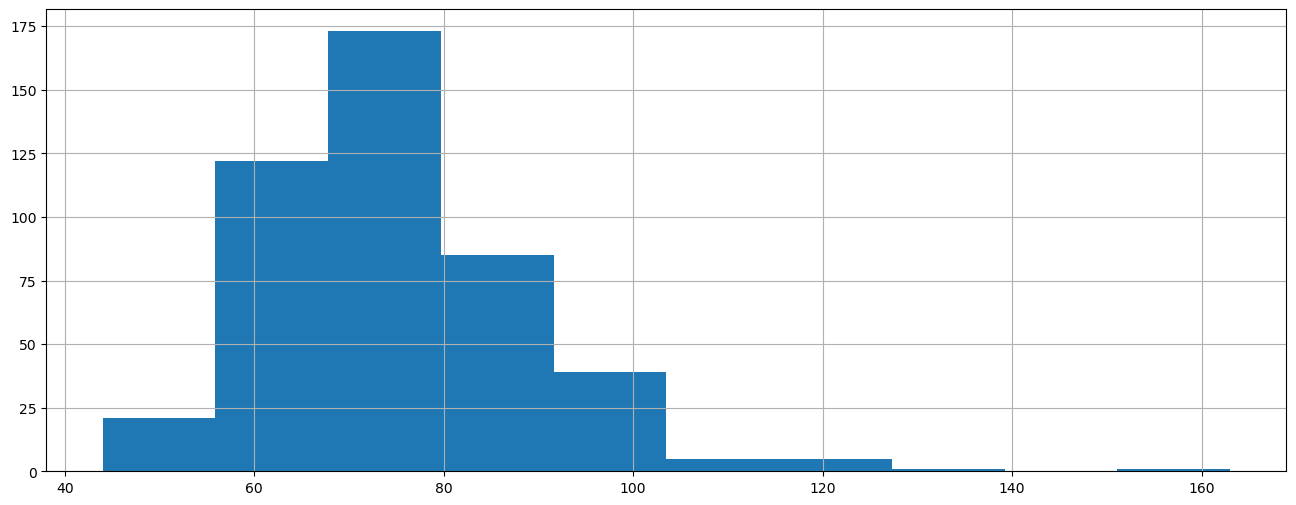

In [177]:
data_new['Heart rate'].hist(figsize=(16,6))

### Replace the NaN in Heart rate by median 

In [156]:
data_new['Heart rate'] = data_new['Heart rate'].astype(float)
# Calculating the median for Heart RATE
median= data_new['Heart rate'].median()
median

# Replacing the NaN with median
data_new['Heart rate']=data_new['Heart rate'].fillna(median).astype(int)

In [157]:
data_new.describe(include='all')

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,36.236726,48.869469,36.723451,-43.878319,74.457965
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,57.346376,28.622371,35.981100,53.640759,13.855782
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,-179.000000,44.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,14.000000,41.000000,12.000000,-50.000000,65.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,41.000000,54.500000,40.000000,-50.000000,72.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,63.000000,64.000000,62.000000,-50.000000,81.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,179.000000,176.000000,166.000000,178.000000,163.000000


In [158]:
# Check for missing values in the dataset again
data_new.isnull().sum()

Age             0
Sex             0
Height          0
Weight          0
QRS Duration    0
P-R interval    0
Q-T interval    0
T interval      0
P interval      0
QRS             0
T               0
P               0
QRST            0
J               0
Heart rate      0
dtype: int64

#### cHECKING FOR THE dATA TYPE of our variables

In [159]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           452 non-null    int64
 1   Sex           452 non-null    int64
 2   Height        452 non-null    int64
 3   Weight        452 non-null    int64
 4   QRS Duration  452 non-null    int64
 5   P-R interval  452 non-null    int64
 6   Q-T interval  452 non-null    int64
 7   T interval    452 non-null    int64
 8   P interval    452 non-null    int64
 9   QRS           452 non-null    int64
 10  T             452 non-null    int64
 11  P             452 non-null    int64
 12  QRST          452 non-null    int64
 13  J             452 non-null    int64
 14  Heart rate    452 non-null    int64
dtypes: int64(15)
memory usage: 53.1 KB


In [160]:
data_new.head(10)

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,-50,63
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,-50,53
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,-50,71
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,-50,72
5,13,0,169,51,100,167,321,174,91,107,66,52,88,-50,84
6,40,1,160,52,77,129,377,133,77,77,49,75,65,-50,70
7,49,1,162,54,78,0,376,157,70,67,7,8,51,-50,67
8,44,0,168,56,84,118,354,160,63,61,69,78,66,84,64
9,50,1,167,67,89,130,383,156,73,85,34,70,71,-50,63


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff435572ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff435572ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff435572830>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff435573430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4355736d0>,
 'means': []}

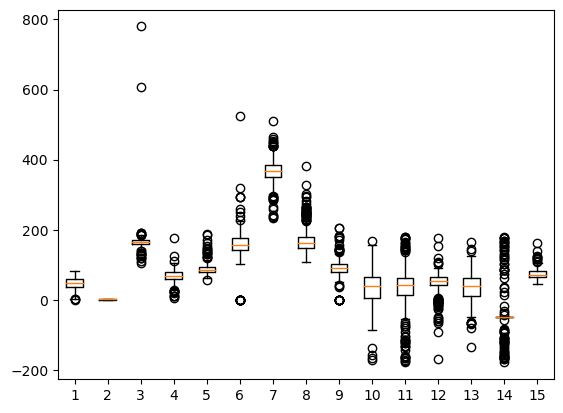

In [179]:
plt.boxplot(data_new)

## Identifying Outliers

In [168]:
## Finding Outliers
# Calculate the quartiles and IQR
Q1 = np.percentile(data_new, 25, axis=0)
Q3 = np.percentile(data_new, 75, axis=0)
IQR = Q3 - Q1

# Set the threshold for outliers
threshold = 1.5

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = data_new[(data_new < lower_bound) | (data_new > upper_bound)]

print(outliers) 


     Age  Sex  Height  Weight  QRS Duration  P-R interval  Q-T interval  \
0    NaN  NaN   190.0     NaN           NaN           NaN           NaN   
1    NaN  NaN     NaN     NaN           NaN           NaN           NaN   
2    NaN  NaN     NaN     NaN         138.0           NaN           NaN   
3    NaN  NaN     NaN     NaN           NaN           NaN           NaN   
4    NaN  NaN   190.0     NaN           NaN           NaN           NaN   
..   ...  ...     ...     ...           ...           ...           ...   
447  NaN  NaN     NaN     NaN           NaN           NaN           NaN   
448  NaN  NaN   190.0     NaN           NaN           NaN           NaN   
449  NaN  NaN     NaN     NaN           NaN           NaN           NaN   
450  NaN  NaN     NaN     NaN           NaN           NaN           NaN   
451  NaN  NaN     NaN     NaN           NaN           NaN           NaN   

     T interval  P interval  QRS   T     P  QRST      J  Heart rate  
0           NaN         NaN  

### Replacing Outliers

In [204]:
from scipy.stats.mstats import winsorize

# Winsorize the dataset
data_winsorized = pd.DataFrame()    
for column in data_new.columns:
    data_winsorized[column] = winsorize(data_new[column], limits=[0.05, 0.05])

# Show the Winsorized dataset
print(data_winsorized)






     Age  Sex  Height  Weight  QRS Duration  P-R interval  Q-T interval  \
0     72    0     178      80            91           193           371   
1     56    1     165      64            81           174           401   
2     54    0     172      94           111           163           386   
3     55    0     175      94           100           202           380   
4     72    0     178      80            88           181           360   
..   ...  ...     ...     ...           ...           ...           ...   
447   53    1     160      70            80           199           382   
448   37    0     178      85           100           137           361   
449   36    0     166      68           108           176           365   
450   32    1     155      55            93           109           386   
451   72    1     160      70            79           127           364   

     T interval  P interval  QRS   T   P  QRST    J  Heart rate  
0           174         121  -16 

In [ ]:
# ### Using the trimming method removes a certain percentage of the highest and lowest values in the dataset. 

# trimmed_data = data_new[(data_new >= lower_bound) & (data_new <= upper_bound)]

# # Print the original data and trimmed data
# #print("Original Data: ", data_new)
# print("Trimmed Data: ", trimmed_data)

In [ ]:
# ## Finding Outliers
# # Calculate the quartiles and IQR
# Q1 = np.percentile(trimmed_data, 25, axis=0)
# Q3 = np.percentile(trimmed_data, 75, axis=0)
# IQR = Q3 - Q1

# # Set the threshold for outliers
# threshold = 1.5

# # Calculate the lower and upper bounds for outliers
# lower_bound = Q1 - threshold * IQR
# upper_bound = Q3 + threshold * IQR

# outliers = trimmed_data[(trimmed_data < lower_bound) | (trimmed_data > upper_bound)]

# print(outliers) 

In [ ]:
# trimmed_data.info()

### Using a box plot to see outliers

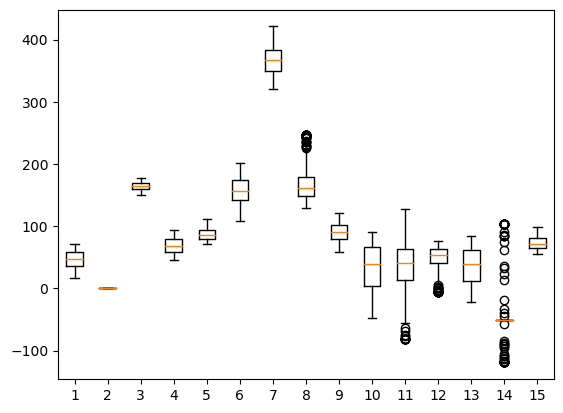

In [197]:
plt.boxplot(data_winsorized)
plt.show()

## Relationsips in our Data

In [183]:
data_winsorized['J']

0      -50
1      -50
2       23
3      -50
4      -50
      ... 
447    -50
448    -50
449     84
450    103
451    -50
Name: J, Length: 452, dtype: int64

#### Using stasticals methods

In [205]:
### Using a correlation matrix to determine the relationship between Heart RATE and other varables
## Dropping the Categorical attribute sex from the data set

data_drop = data_winsorized.drop('Sex', axis='columns')
print(data_drop)
# Create a correlation matrix
corr_matrix = data_drop.corr()
# print(corr_matrix)

# Getting a summary of variables that are closely correlated with the target variable
corr_matrix["Heart rate"].sort_values(ascending=False)


     Age  Height  Weight  QRS Duration  P-R interval  Q-T interval  \
0     72     178      80            91           193           371   
1     56     165      64            81           174           401   
2     54     172      94           111           163           386   
3     55     175      94           100           202           380   
4     72     178      80            88           181           360   
..   ...     ...     ...           ...           ...           ...   
447   53     160      70            80           199           382   
448   37     178      85           100           137           361   
449   36     166      68           108           176           365   
450   32     155      55            93           109           386   
451   72     160      70            79           127           364   

     T interval  P interval  QRS   T   P  QRST    J  Heart rate  
0           174         121  -16  13  64    -2  -50          63  
1           149          58

Heart rate      1.000000
P interval      0.131275
P               0.109141
J               0.104523
T interval      0.078500
QRST            0.009223
P-R interval   -0.012758
QRS Duration   -0.022078
QRS            -0.025120
Weight         -0.042454
Height         -0.051295
T              -0.070100
Age            -0.115379
Q-T interval   -0.632684
Name: Heart rate, dtype: float64

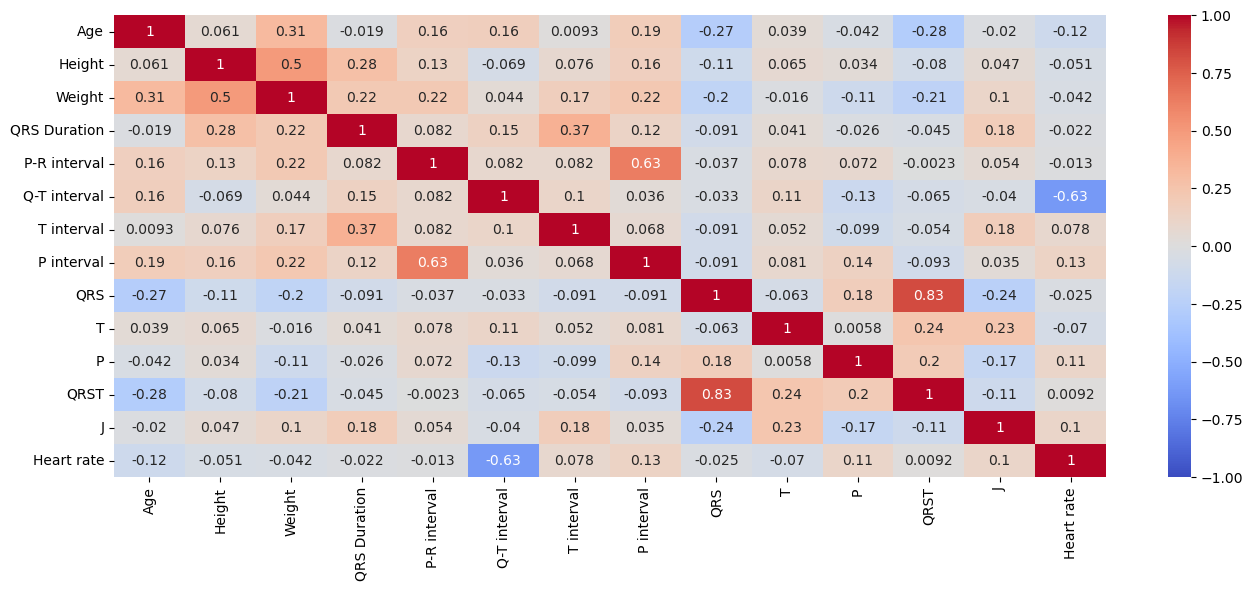

In [206]:
plt.figure(figsize=(16,6))
# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, vmin=-1, vmax=1 , annot=True, cmap="coolwarm")


# Show the plot
plt.show()

## Getting the correlation matrix for the varoables closely related to the Heart Rate

In [207]:
# Calculating correlation matrix
ContinuousCols=['P interval','P', 'J', 'T interval', 'Sex','QRST']

# Creating the correlation matrix
CorrelationData=data_winsorized[ContinuousCols].corr()
CorrelationData

,P interval,P,J,T interval,Sex,QRST
P interval,1.000000,0.141097,0.034809,0.068334,-0.095480,-0.093025
P,0.141097,1.000000,-0.165259,-0.099063,0.018914,0.203064
J,0.034809,-0.165259,1.000000,0.175189,-0.089745,-0.110738
T interval,0.068334,-0.099063,0.175189,1.000000,-0.227012,-0.054313
Sex,-0.095480,0.018914,-0.089745,-0.227012,1.000000,0.013009
QRST,-0.093025,0.203064,-0.110738,-0.054313,0.013009,1.000000


### Relationship between Sex ( categorical ) and Heart Rate ( continous )

In [208]:
# Anova

# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [209]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Sex']
FunctionAnova(inpData=data_winsorized, 
              TargetVariable='Heart rate', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Sex is NOT correlated with Heart rate | P-Value: 0.10306618907387093


[]

# Findings of the Study

Based on the correlation matrix and ANOVA test results, there is no significant evidence to suggest that sex is associated with heart rate in the arrhythmia dataset.The ANOVA test shows that the p-value is greater than the significance level of 0.05. Therefore, we cannot reject the null hypothesis that sex and heart rate are independent variables.

However, the other variables such as P interval, P wave, J wave, and T interval show a moderate positive correlation with heart rate, which suggests that they may be potential predictors of heart rate in the dataset.